<a href="https://colab.research.google.com/github/Rishabh672003/Learning-machine-learning/blob/main/jupyter-notebooks/facial-emoion-recognition-FER2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization


In [2]:
!wget https://github.com/Iliescu-Dorin/FaceExpressionEnsemble/raw/main/Datasets/Fer2013/fer2013.rar
!unrar x /content/fer2013.rar

--2024-01-21 06:24:13--  https://github.com/Iliescu-Dorin/FaceExpressionEnsemble/raw/main/Datasets/Fer2013/fer2013.rar
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Iliescu-Dorin/FaceExpressionEnsemble/main/Datasets/Fer2013/fer2013.rar [following]
--2024-01-21 06:24:13--  https://raw.githubusercontent.com/Iliescu-Dorin/FaceExpressionEnsemble/main/Datasets/Fer2013/fer2013.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89940611 (86M) [application/octet-stream]
Saving to: ‘fer2013.rar’

fer2013.rar         100%[===================>]  85.77M   147MB/s    in 0.6s    

2024-01-21 06:24:14 (147 

In [3]:
data = pd.read_csv('fer2013.csv')

In [4]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [6]:
data['pixels'] = data['pixels'].apply(lambda x: np.fromstring(x ,dtype='float',sep=" "))

In [7]:
data['pixels'] = data['pixels'].apply(lambda x: (np.array(x)).reshape(48,48))

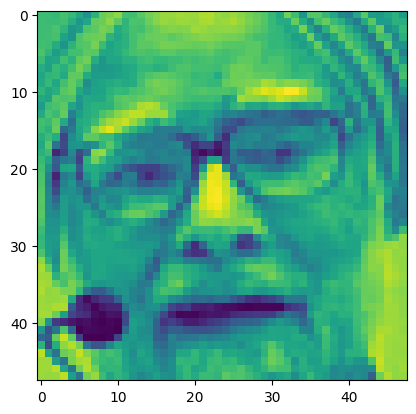

In [8]:
import matplotlib.pyplot as plt
plt.imshow(data['pixels'][1])

In [9]:
data.drop(columns=['Usage'],inplace = True)

In [10]:
X = data['pixels'].apply(np.array).values
y = data['emotion'].apply(np.array).values

2

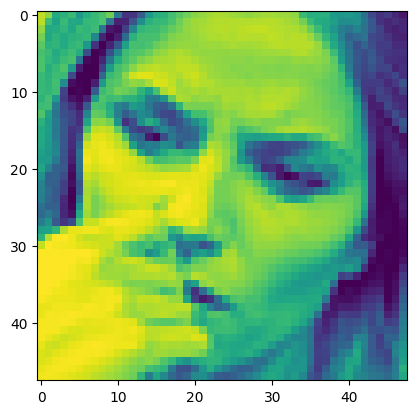

In [11]:
plt.imshow(data['pixels'][2])
y[2]

In [12]:
X = np.stack(X)
X.shape

(35887, 48, 48)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [14]:
X_test.shape, y_test.shape

((8972, 48, 48), (8972,))

In [15]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [16]:
X_train.shape, X_test.shape

((26915, 48, 48, 1), (8972, 48, 48, 1))

In [17]:
y_train.shape, y_test.shape

((26915,), (8972,))

In [18]:
K = 7

In [19]:
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [20]:
sgd = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.01,
    momentum=0.9,
    nesterov=True,
)

model.compile(optimizer = sgd,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],)

## Making model without data augmentation

In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', verbose = 1, patience=2, restore_best_weights=True)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    callbacks=[callback],
    epochs = 50,
)

Epoch 1/50
842/842 [==============================] - 17s 13ms/step - loss: 1.7731 - accuracy: 0.3216 - val_loss: 1.6699 - val_accuracy: 0.3346
Epoch 2/50
842/842 [==============================] - 9s 11ms/step - loss: 1.5656 - accuracy: 0.3876 - val_loss: 1.6734 - val_accuracy: 0.3463
Epoch 3/50
842/842 [==============================] - 9s 11ms/step - loss: 1.4703 - accuracy: 0.4306 - val_loss: 1.4570 - val_accuracy: 0.4415
Epoch 4/50
842/842 [==============================] - 10s 12ms/step - loss: 1.3553 - accuracy: 0.4830 - val_loss: 1.3814 - val_accuracy: 0.4523
Epoch 5/50
842/842 [==============================] - 10s 11ms/step - loss: 1.2247 - accuracy: 0.5321 - val_loss: 1.3419 - val_accuracy: 0.4994
Epoch 6/50
842/842 [==============================] - 9s 11ms/step - loss: 1.0990 - accuracy: 0.5868 - val_loss: 1.2173 - val_accuracy: 0.5496
Epoch 7/50
842/842 [==============================] - 10s 12ms/step - loss: 0.9663 - accuracy: 0.6386 - val_loss: 1.1784 - val_accuracy: 0.

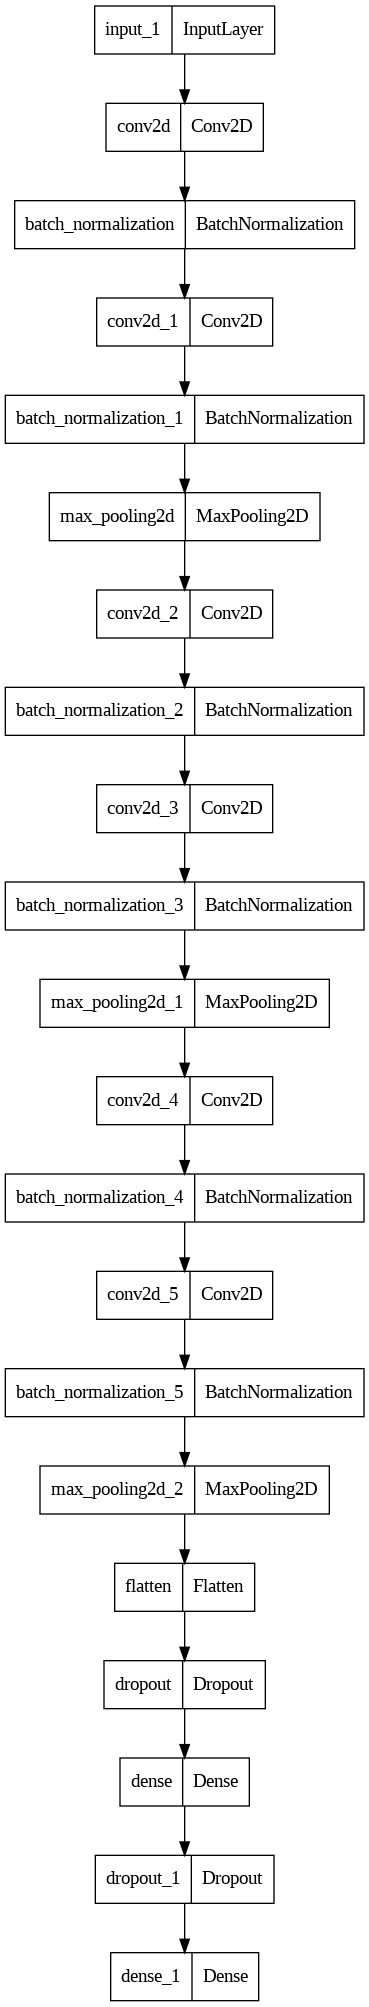

In [22]:
from keras.utils import plot_model
plot_model(model)

<function matplotlib.pyplot.legend(*args, **kwargs)>

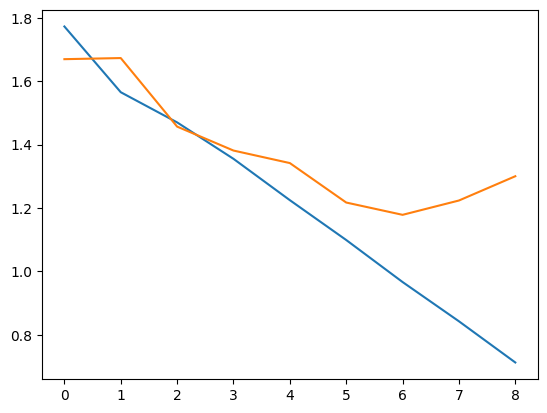

In [23]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val-loss')
plt.legend

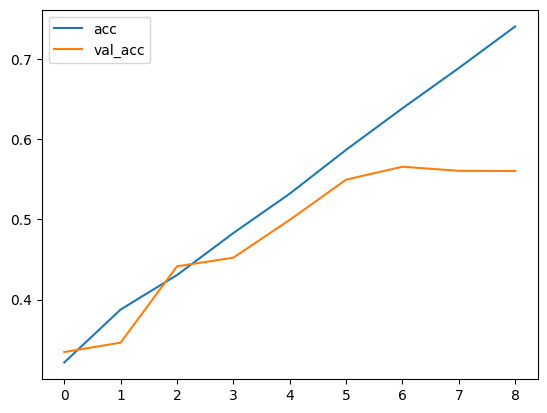

In [24]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Making model with Data augmentation

In [28]:
batch_size = 32

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', verbose = 1, patience=5, restore_best_weights=True)

r = model.fit(train_generator,
              validation_data=(X_test, y_test),
              steps_per_epoch=steps_per_epoch,
              callbacks=[callback],
              epochs=50)

Epoch 1/50
841/841 [==============================] - 23s 25ms/step - loss: 1.8425 - accuracy: 0.2785 - val_loss: 1.6733 - val_accuracy: 0.3378
Epoch 2/50
841/841 [==============================] - 19s 23ms/step - loss: 1.6596 - accuracy: 0.3354 - val_loss: 1.5977 - val_accuracy: 0.3553
Epoch 3/50
841/841 [==============================] - 19s 23ms/step - loss: 1.5875 - accuracy: 0.3724 - val_loss: 1.4899 - val_accuracy: 0.4259
Epoch 4/50
841/841 [==============================] - 18s 21ms/step - loss: 1.5095 - accuracy: 0.4128 - val_loss: 1.4426 - val_accuracy: 0.4390
Epoch 5/50
841/841 [==============================] - 19s 22ms/step - loss: 1.4253 - accuracy: 0.4466 - val_loss: 1.3397 - val_accuracy: 0.4866
Epoch 6/50
841/841 [==============================] - 18s 21ms/step - loss: 1.3457 - accuracy: 0.4831 - val_loss: 1.2782 - val_accuracy: 0.5186
Epoch 7/50
841/841 [==============================] - 18s 21ms/step - loss: 1.2770 - accuracy: 0.5149 - val_loss: 1.1849 - val_accuracy:

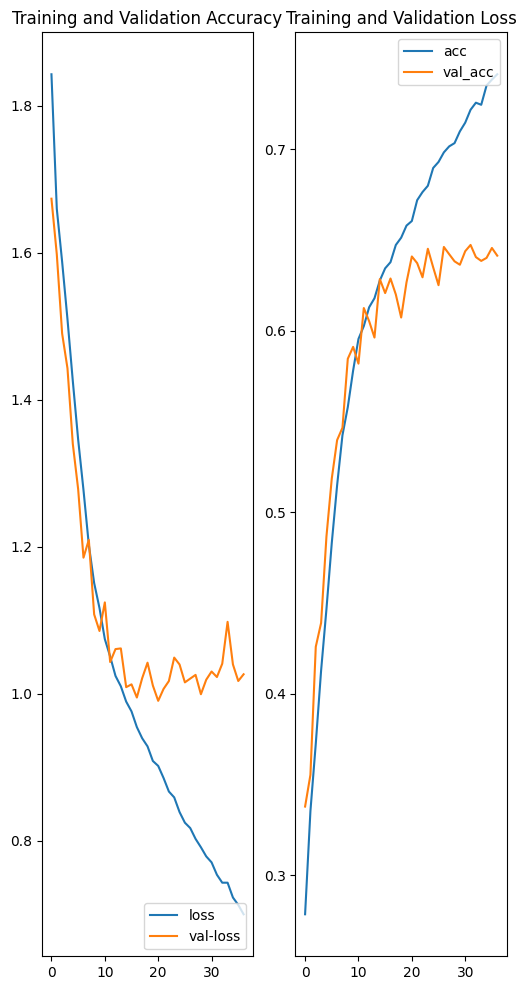

In [29]:
plt.figure(figsize=(6, 12))
plt.subplot(1, 2, 1)
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val-loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
